In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [29]:
oil_filename = '../data/wti-daily.csv'
oil_df = pd.read_csv(oil_filename, 
                     parse_dates=[0], 
                     header=0,
                     names=['date', 'oil'],
                    index_col=0)

ice_cream_filename = '../data/ice-cream.csv'
ice_cream_df = pd.read_csv(ice_cream_filename, 
                           parse_dates=[0], 
                           index_col=0,
                           header=0,
                          names=['date','icecream'])
ice_cream_df['icecream'].str.contains(r'\d').value_counts()
ice_cream_df = ice_cream_df[ice_cream_df['icecream'].str.contains(r'\d')]
ice_cream_df['icecream'] = ice_cream_df['icecream'].astype(np.float64)

miles_filename = '../data/miles-traveled.csv'
miles_df = pd.read_csv(miles_filename, parse_dates=[0], 
                       index_col=0,
                       header=0,
                      names=['date', 'miles'])

df = oil_df.join(ice_cream_df, how='inner').join(miles_df, how='inner')


# Beyond 1

Is the month correlated with these values? And if not, why would we get such weird values?

In [18]:
df = df.reset_index()
df['month'] = df['date'].dt.month
df = df.set_index('date')
df.corr()

,oil,icecream,miles,month
oil,1.000000,0.777347,0.645250,0.006616
icecream,0.777347,1.000000,0.818383,-0.003985
miles,0.645250,0.818383,1.000000,0.079290
month,0.006616,-0.003985,0.079290,1.000000


# Beyond 2

Create a scatter plot of `icecream` vs. `miles`, adding color using the month the "Spectral" colormap.

<AxesSubplot:xlabel='icecream', ylabel='miles'>

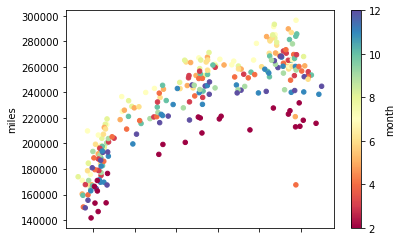

In [19]:
df.plot.scatter(x='icecream', y='miles', c='month', colormap='Spectral')


# Beyond 3

Instead of using an inner join, we could have removed all of the rows from `oil_df` that weren't on the final day of the month. How could we do that?

In [30]:
oil_df = oil_df.reset_index()
oil_df = oil_df[oil_df['date'].dt.is_month_start]
oil_df = oil_df.set_index('date')

df = oil_df.join(ice_cream_df).join(miles_df)
df.head()


,oil,icecream,miles
date,,,
1986-04-01,11.13,2.382,150277.0
1986-05-01,13.80,2.368,160459.0
1986-07-01,12.39,2.369,171114.0
1986-08-01,11.56,2.319,173977.0
1986-10-01,15.23,2.377,159434.0
